In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import string

#import seaborn as sns
#sns.set()

In [2]:
def adathalmaz_generalo(sorok_szama=10000,oszlopszam=2,target_fv=lambda x: x['a'],zajszint=1.0,zajvaltozok_szam=2):
    min_v=0.0
    max_v=10.0
    round_v=2
    df = pd.DataFrame({'id':list(range(sorok_szama))})
    for i in range(zajvaltozok_szam):
        df['zaj'+str(i)]=np.random.uniform(low=min_v, high=max_v, size=sorok_szama)
    for i in string.ascii_lowercase[:oszlopszam]:
        df[i]=np.random.uniform(low=min_v, high=max_v, size=sorok_szama)
    for v in list(df.columns)[1:]:
        df[v]=df[v].apply(lambda x: np.round(x,round_v))
    df['target']=df.apply(target_fv,axis=1)
    df['target_noise']=np.random.normal(loc=0.0, scale=zajszint, size=sorok_szama)
    df['target']=df['target']+df['target_noise']
    del df['target_noise']
    del df['id']
    return df 

In [3]:
test=adathalmaz_generalo(6,2,lambda x: x['a']+x['b'],0.1,1)
test

,zaj0,a,b,target
0,7.94,3.95,0.35,4.223997
1,7.47,4.19,4.13,8.357792
2,6.86,1.08,0.74,1.873518
3,6.75,4.03,2.88,7.049678
4,9.19,6.16,9.20,15.303866
5,5.91,3.25,9.95,13.237864


# Feladvány adathalmazok - 1D eset

In [4]:
datasets={}

datasets['egyenes'] = adathalmaz_generalo(10000,1,lambda x: 0.5*x['a'],0.1,1)

datasets['egysegugras'] = adathalmaz_generalo(10000,1,lambda x: 0 if x['a']<5 else 10,0.1,1)

datasets['lejto_es_vege']= adathalmaz_generalo(10000,1,lambda x: 0 if x['a']<5 else 3*(x['a']-5),0.1,1)

datasets['sigmoid']= adathalmaz_generalo(10000,1,lambda x: 1/ (np.e**(-1*(x['a']-5))+1) ,0.01,1 )



In [15]:
datasets['cosinus_bonyi']= adathalmaz_generalo(10000,1,lambda x: np.cos(x['a'])*(x['a']*0.2+1) ,0.01,1 )

In [16]:
def egydimenziosat_rajzol(indf,title="",final_show=True):
    plt.scatter(indf['a'],indf['target'],color='blue',s=1,label='target')
    if 'pred' in list(indf.columns):
        plt.scatter(indf['a'],indf['pred'],color='red',s=1,label='pred')
    plt.xlabel("a")
    plt.ylabel("target")
    plt.title(title)
    plt.legend()
    if final_show:
        plt.show()

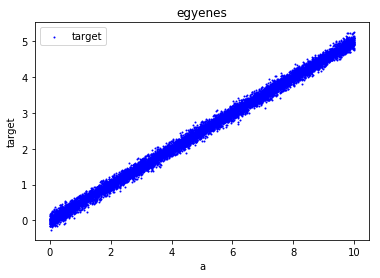

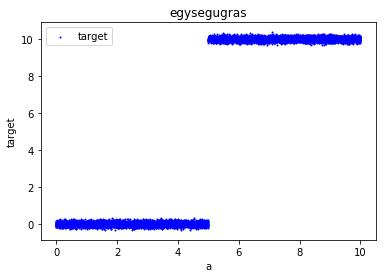

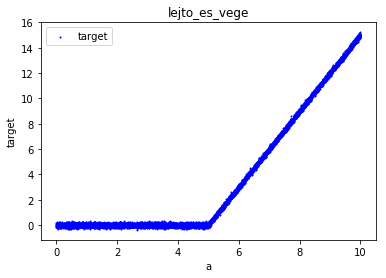

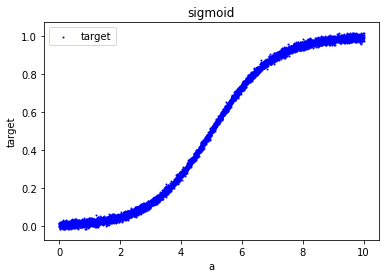

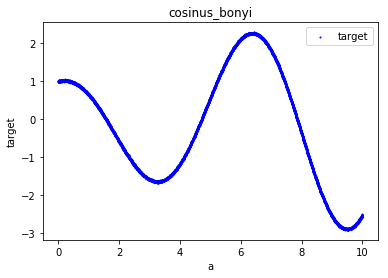

In [17]:
for k in datasets.keys():
    egydimenziosat_rajzol(datasets[k],k)

In [7]:
def szele_levago(indf,min_v=1.0,max_v=9.0):
    outdf=indf.copy()
    for v in list(indf.columns):
        if v in string.ascii_lowercase:
            outdf=outdf[  outdf[v]>=min_v]
            outdf=outdf[  outdf[v]<=max_v]
    return outdf.copy()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [21]:
models=[]


In [22]:
models.append(LinearRegression())

In [24]:
models.append(KNeighborsRegressor(n_neighbors=10))

In [25]:
models.append(DecisionTreeRegressor(max_depth=2))

In [26]:
models.append(RandomForestRegressor(n_estimators=3, max_depth=2))

In [27]:
models.append(GradientBoostingRegressor(n_estimators=3, max_depth=2))

In [28]:
models.append(MLPRegressor(hidden_layer_sizes=(3,)))

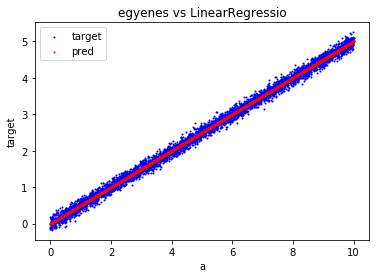

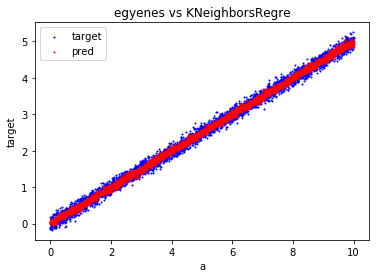

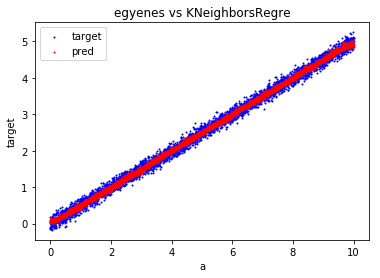

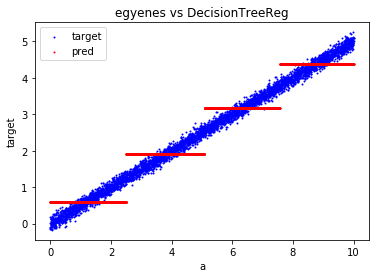

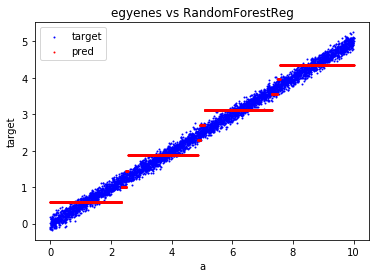

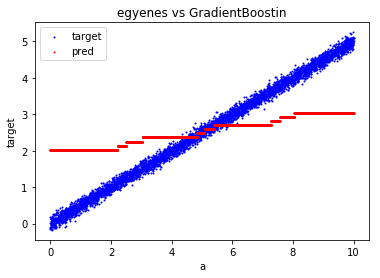

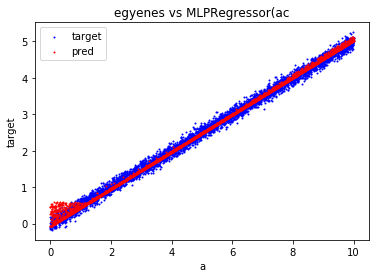

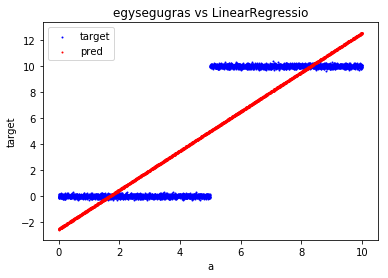

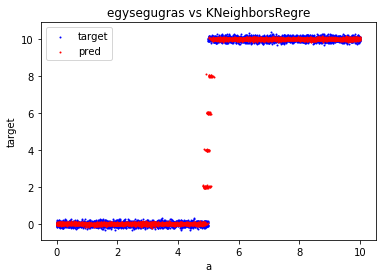

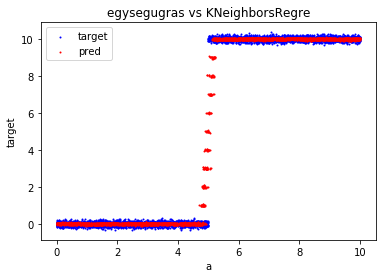

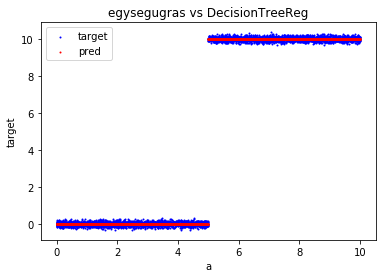

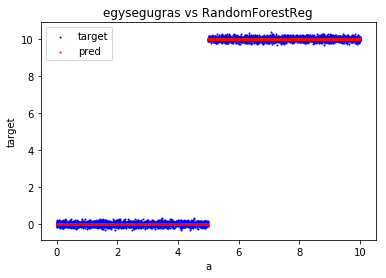

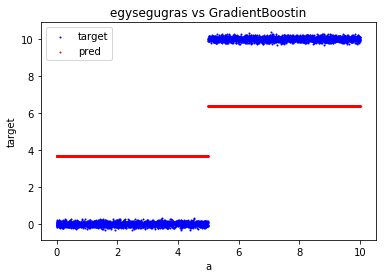

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


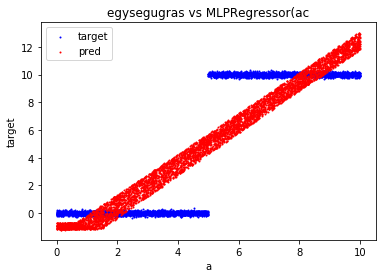

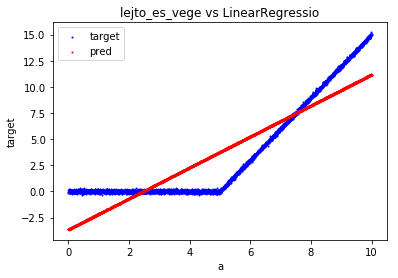

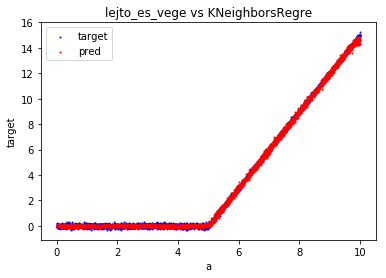

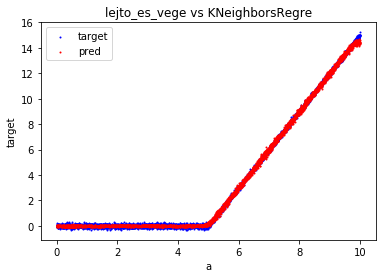

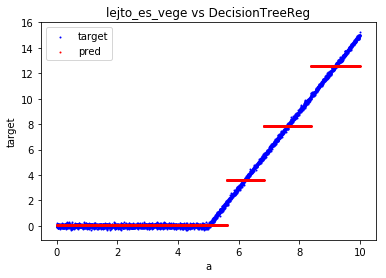

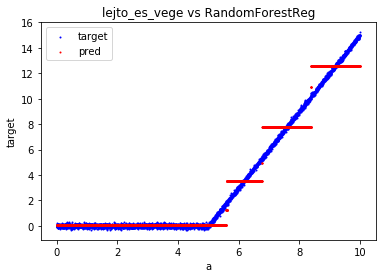

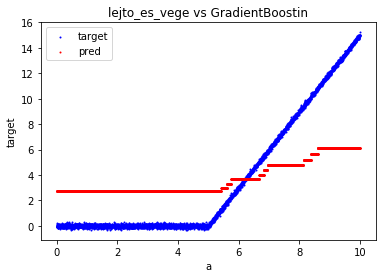

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


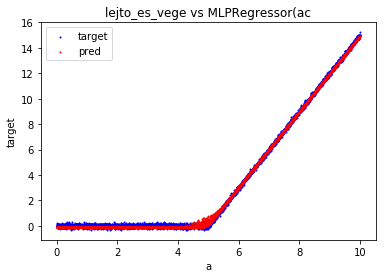

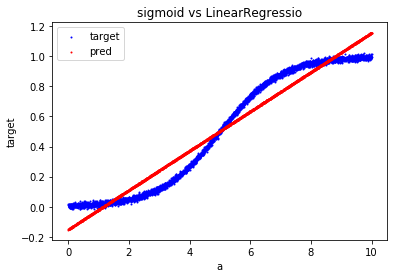

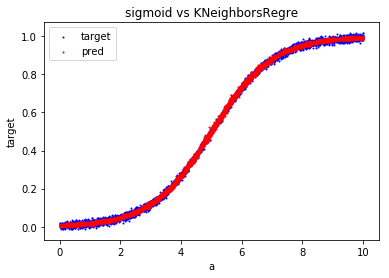

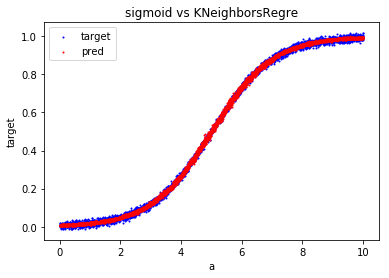

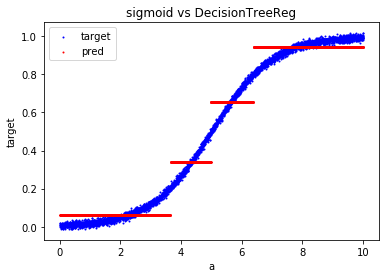

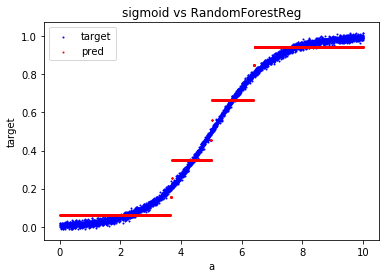

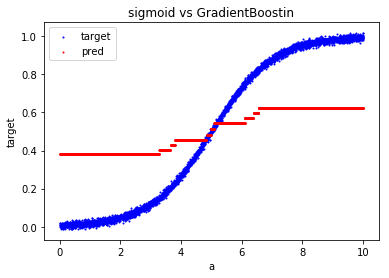

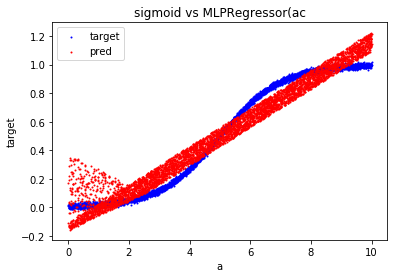

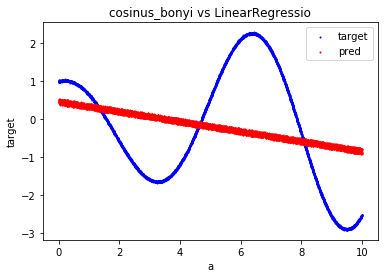

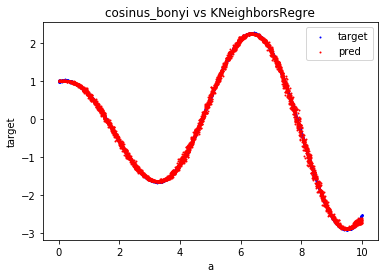

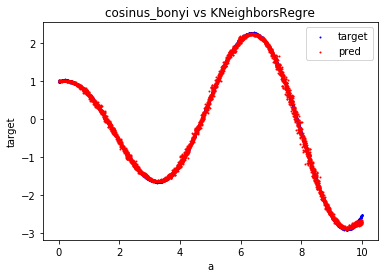

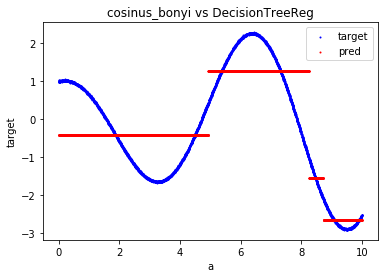

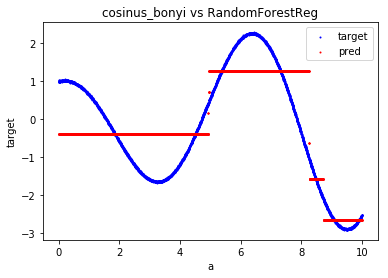

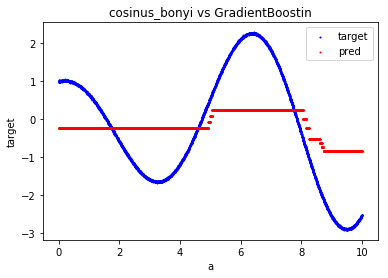

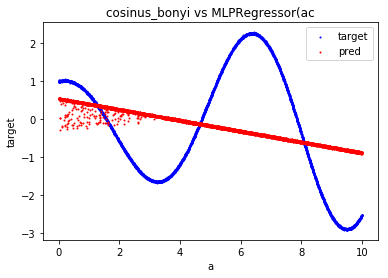

In [41]:
for datasetname in datasets.keys():
    #print(datasetname)
    df=datasets[datasetname].copy()
    train_df=df.iloc[:5000,:].copy()
    test_df=df.iloc[5000:,:].copy()
    
       
    for model in models:
        bemeno_valtozok= train_df.columns[:2]
        model.fit(train_df[bemeno_valtozok], train_df['target'])
        test_df['pred']=model.predict(test_df[bemeno_valtozok])
        egydimenziosat_rajzol(test_df, datasetname+ " vs "+str(model)[:15])

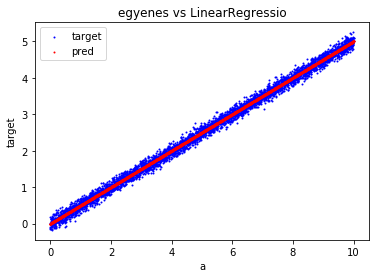

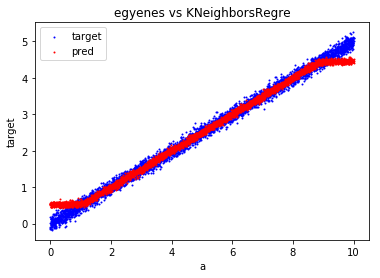

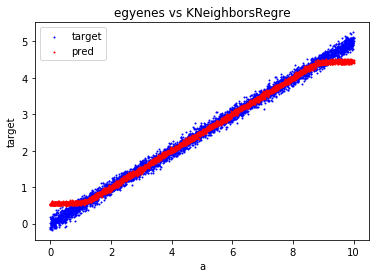

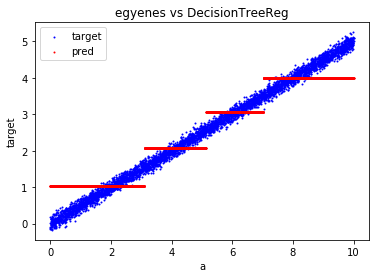

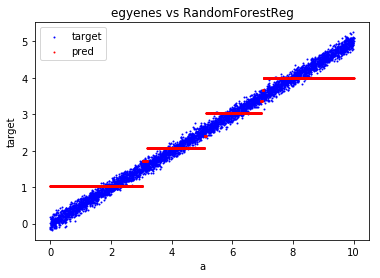

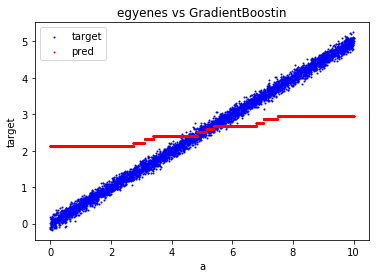

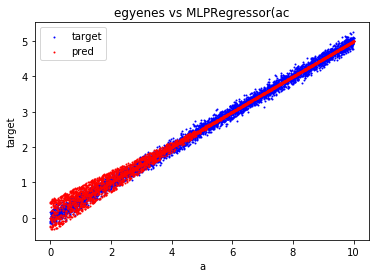

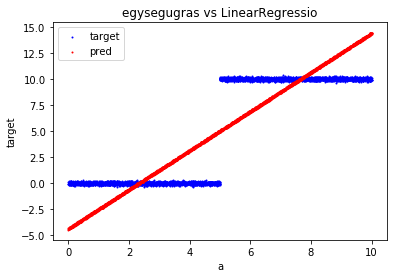

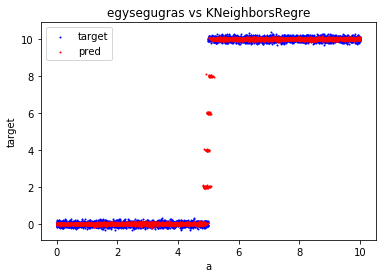

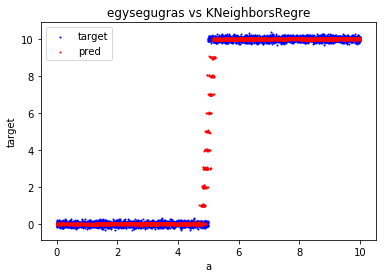

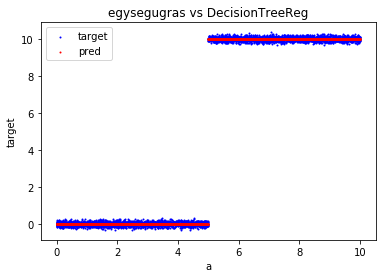

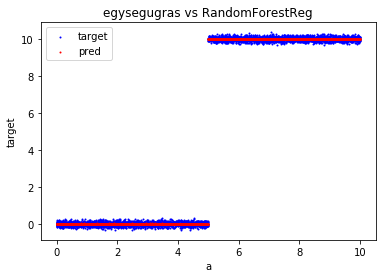

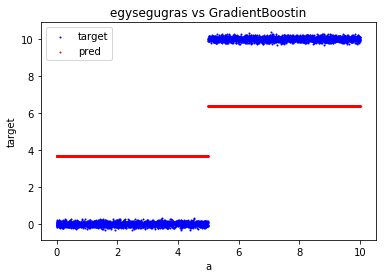

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


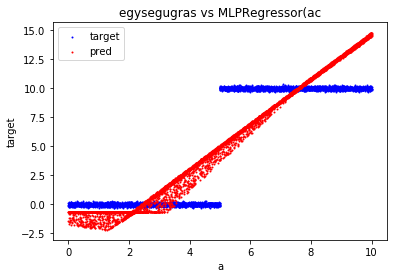

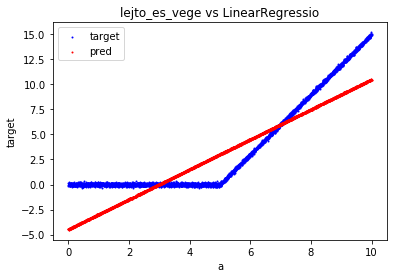

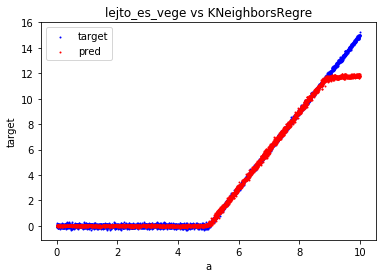

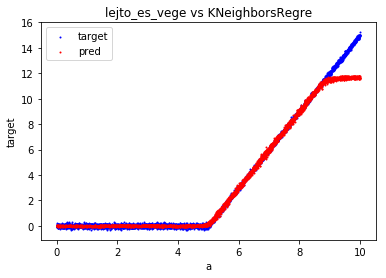

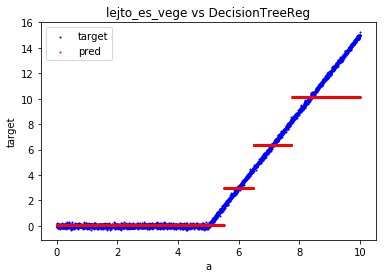

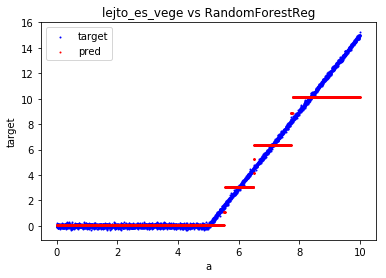

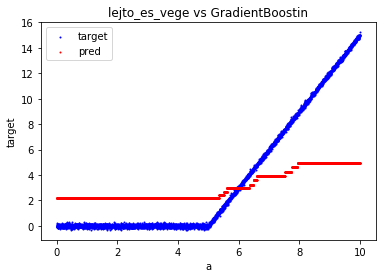

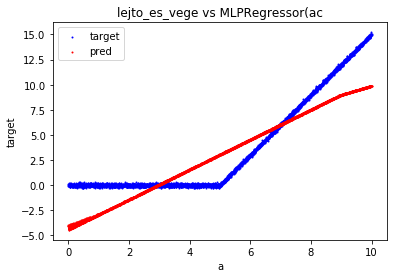

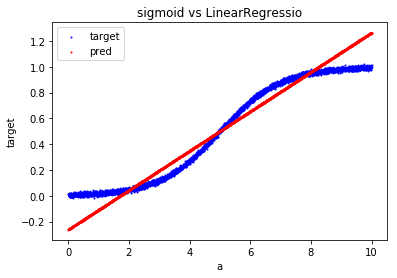

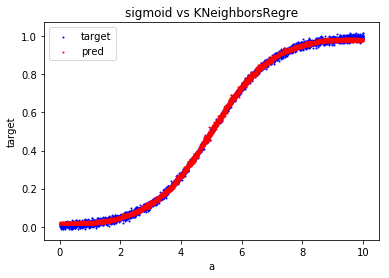

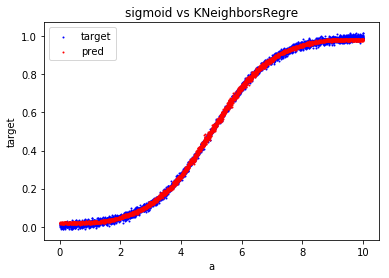

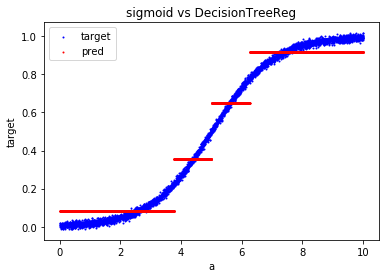

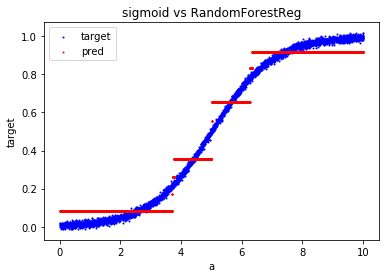

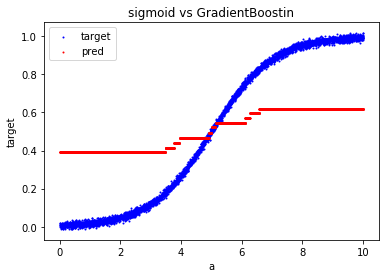

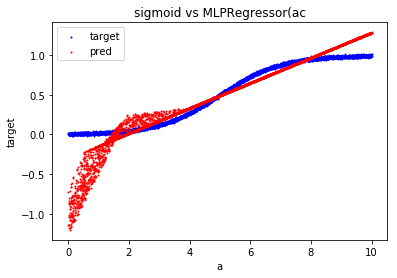

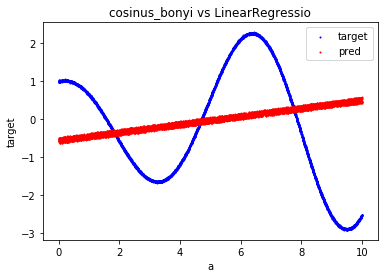

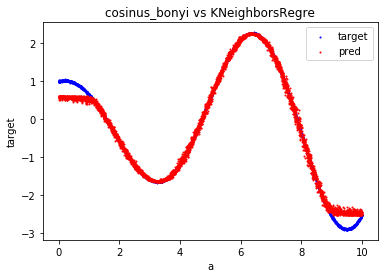

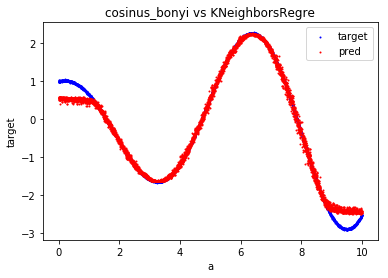

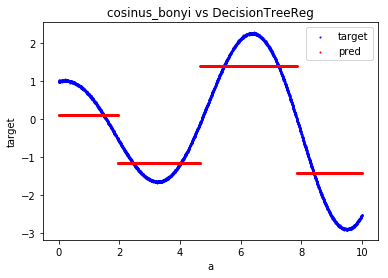

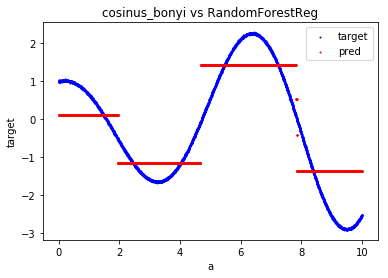

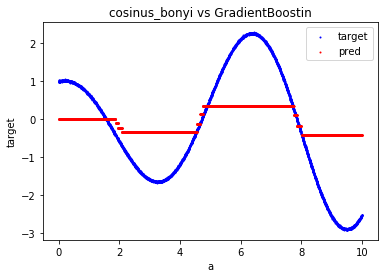

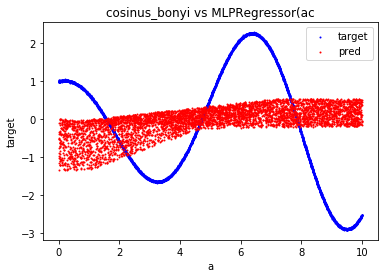

In [35]:
for datasetname in datasets.keys():
    #print(datasetname)
    df=datasets[datasetname].copy()
    train_df=df.iloc[:5000,:].copy()
    test_df=df.iloc[5000:,:].copy()
    
    train_df=train_df[train_df['a']>1.0]
    train_df=train_df[train_df['a']<9.0].copy()
    
    for model in models:
        bemeno_valtozok= train_df.columns[:2]
        model.fit(train_df[bemeno_valtozok], train_df['target'])
        test_df['pred']=model.predict(test_df[bemeno_valtozok])
        egydimenziosat_rajzol(test_df, datasetname+ " vs "+str(model)[:15])

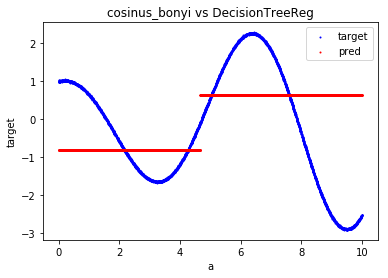

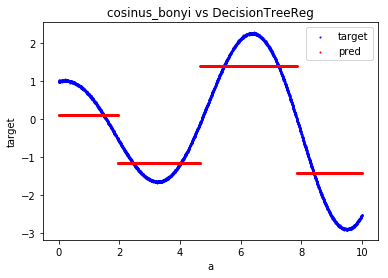

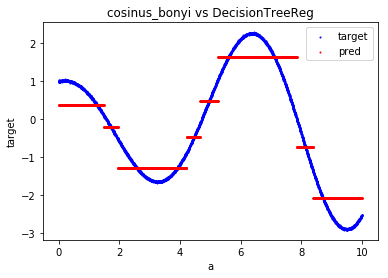

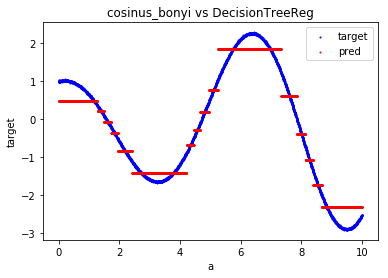

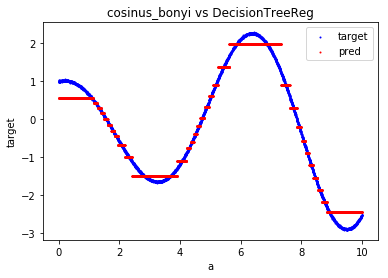

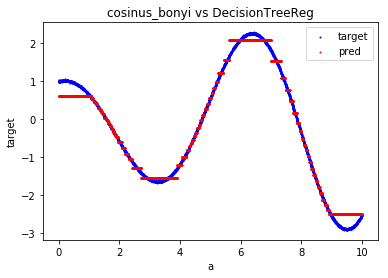

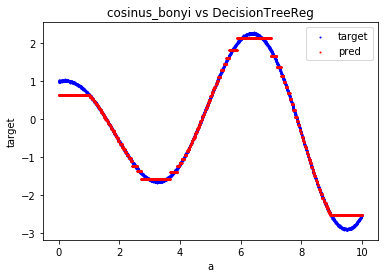

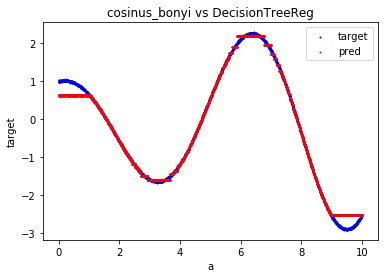

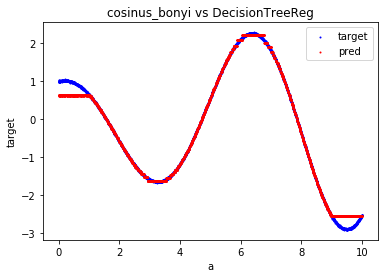

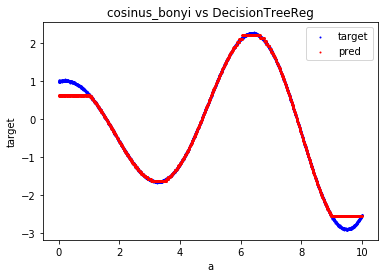

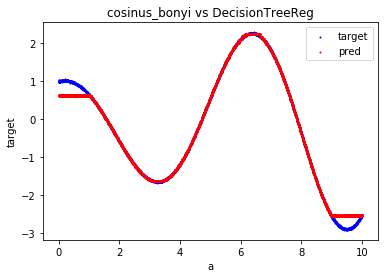

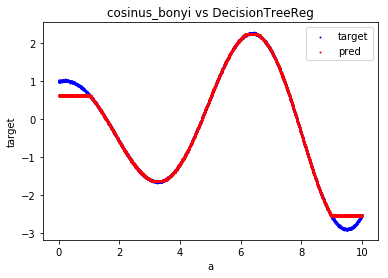

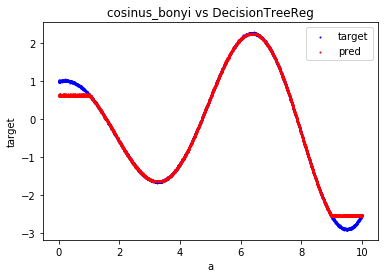

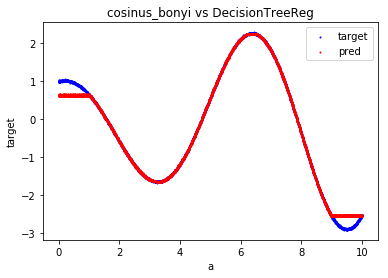

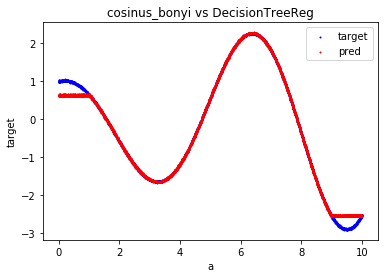

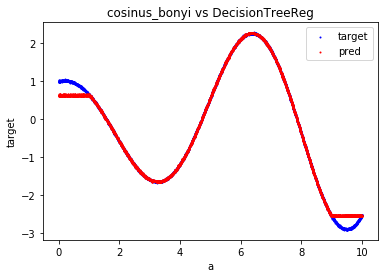

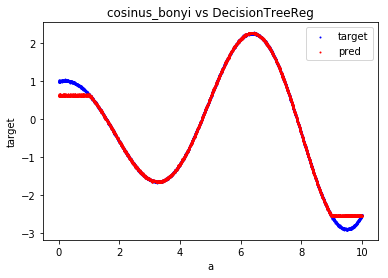

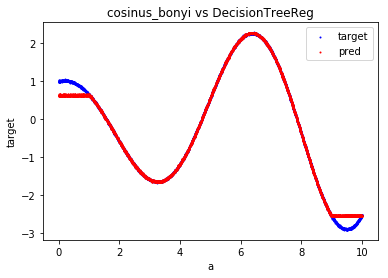

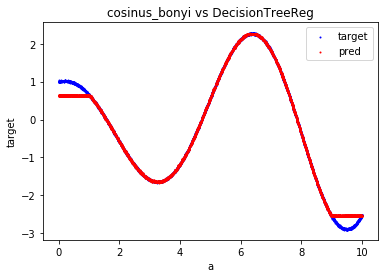

In [40]:
#for datasetname in datasets.keys():
    #print(datasetname)
    
    
    
df=datasets["cosinus_bonyi"].copy()
train_df=df.iloc[:5000,:].copy()
test_df=df.iloc[5000:,:].copy()
    
train_df=train_df[train_df['a']>1.0]
train_df=train_df[train_df['a']<9.0].copy()
    
for i in range(1,20):
        model=DecisionTreeRegressor(max_depth=i)
        bemeno_valtozok= train_df.columns[:2]
        model.fit(train_df[bemeno_valtozok], train_df['target'])
        test_df['pred']=model.predict(test_df[bemeno_valtozok])
        egydimenziosat_rajzol(test_df, datasetname+ " vs "+str(model)[:15])

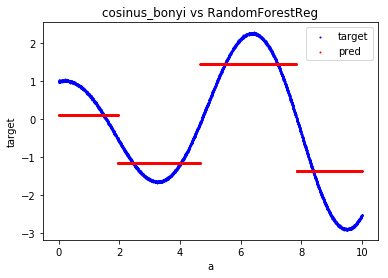

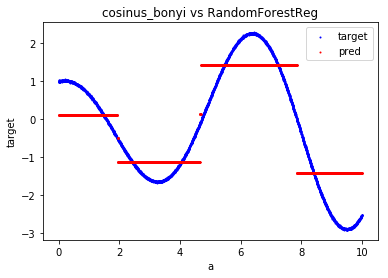

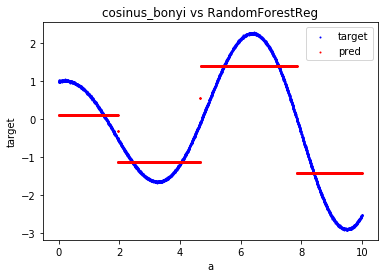

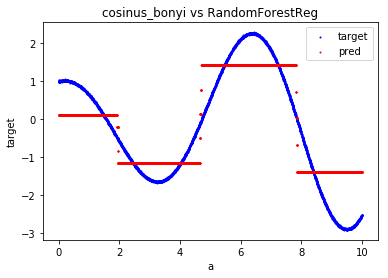

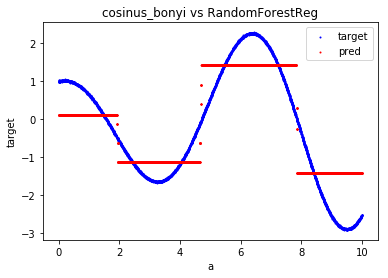

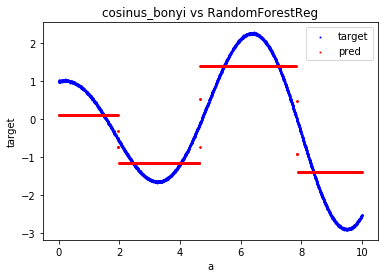

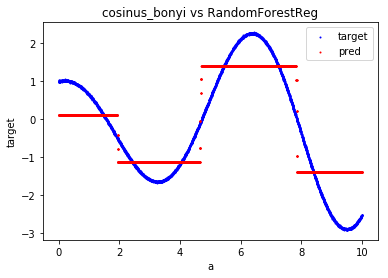

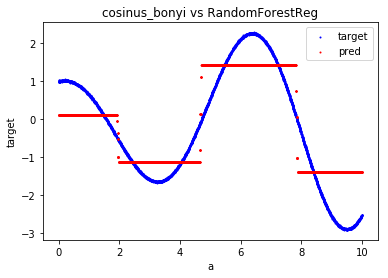

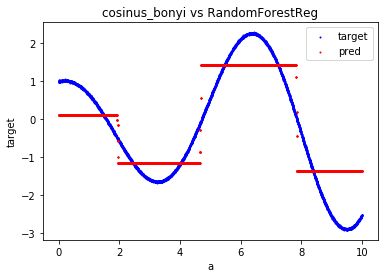

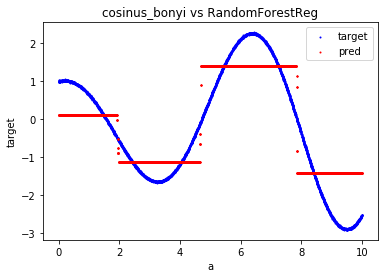

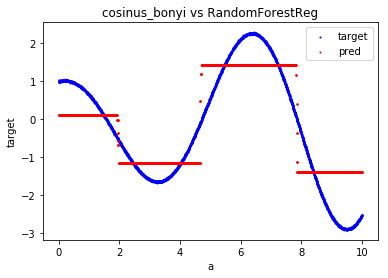

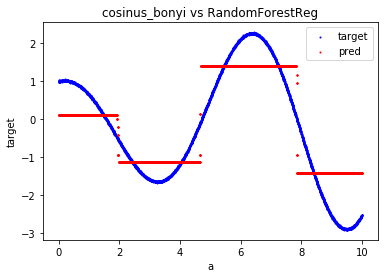

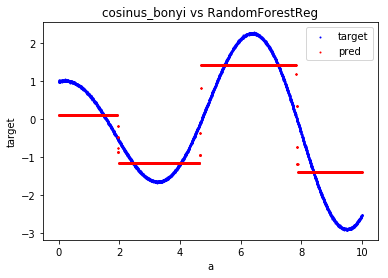

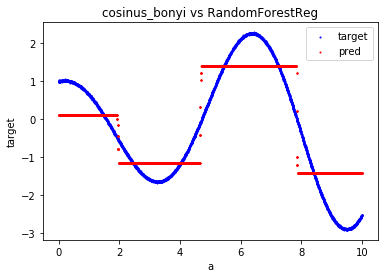

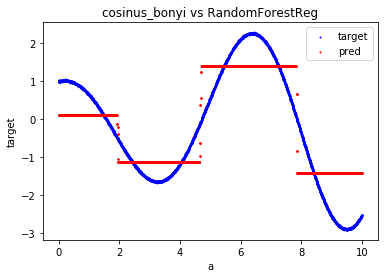

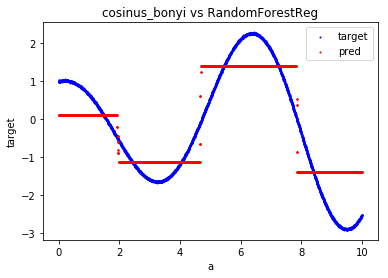

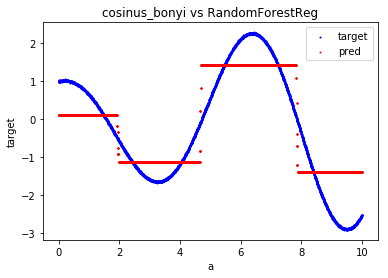

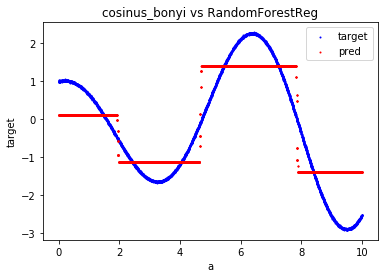

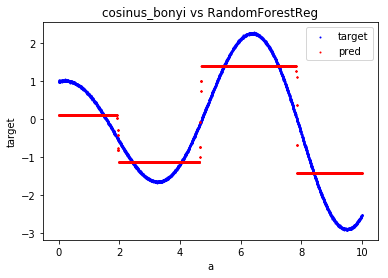

In [39]:
#for datasetname in datasets.keys():
    #print(datasetname)
    
    
    
df=datasets["cosinus_bonyi"].copy()
train_df=df.iloc[:5000,:].copy()
test_df=df.iloc[5000:,:].copy()
    
train_df=train_df[train_df['a']>1.0]
train_df=train_df[train_df['a']<9.0].copy()
    
for i in range(1,20):
        model=RandomForestRegressor(n_estimators=i,max_depth=2)
        bemeno_valtozok= train_df.columns[:2]
        model.fit(train_df[bemeno_valtozok], train_df['target'])
        test_df['pred']=model.predict(test_df[bemeno_valtozok])
        egydimenziosat_rajzol(test_df, datasetname+ " vs "+str(model)[:15])

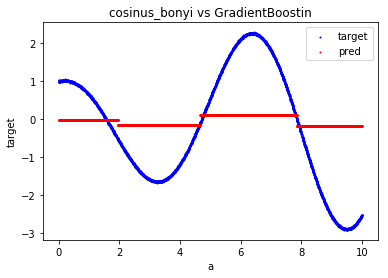

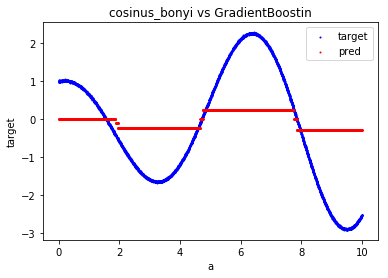

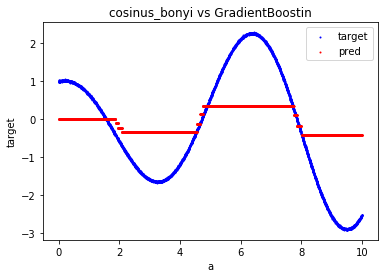

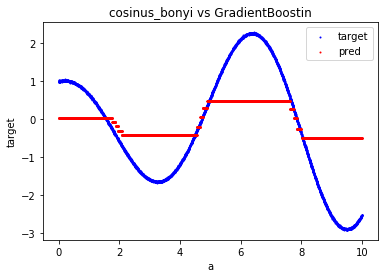

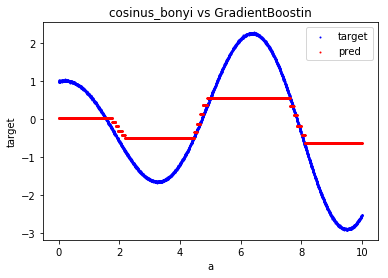

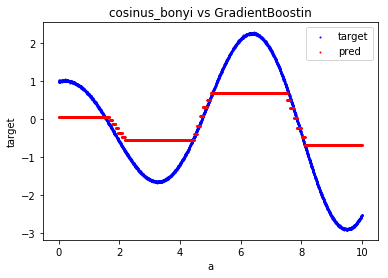

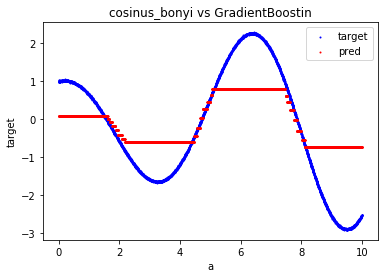

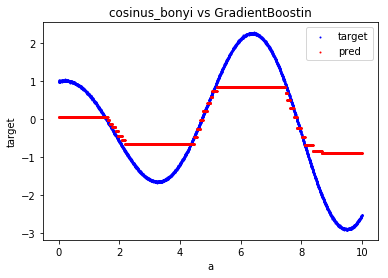

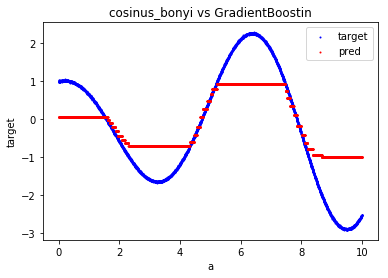

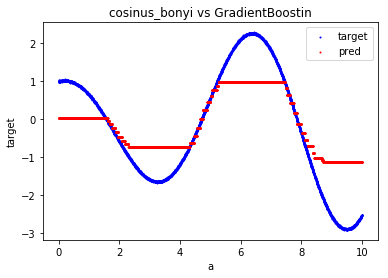

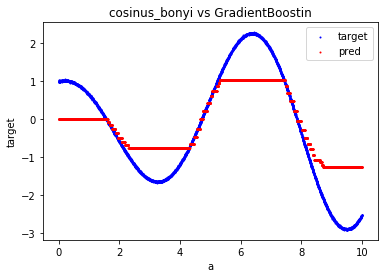

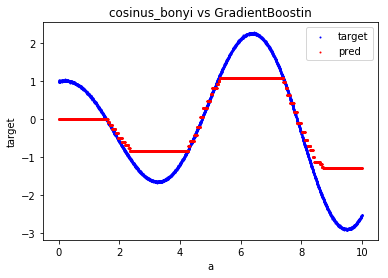

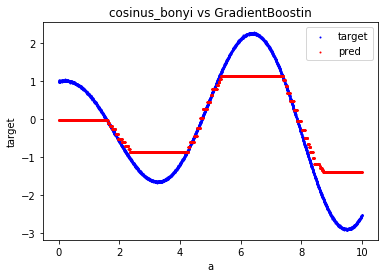

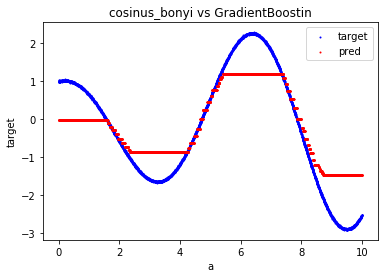

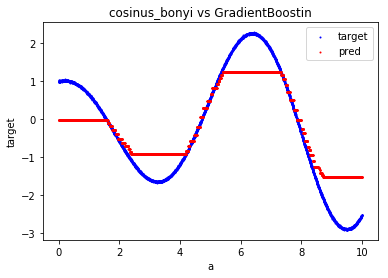

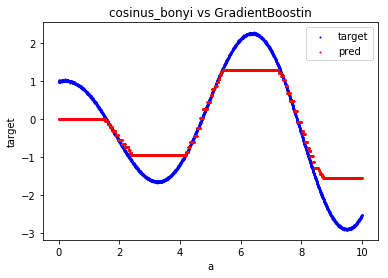

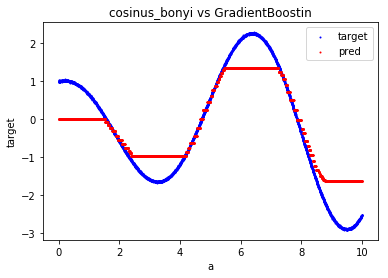

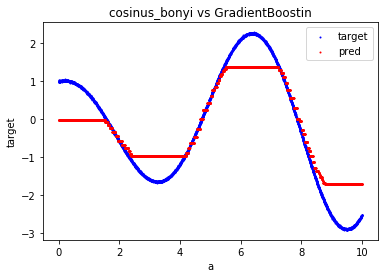

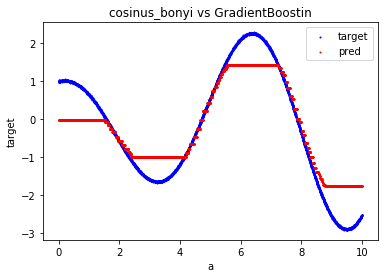

In [42]:
#for datasetname in datasets.keys():
    #print(datasetname)
    
 #éppen h csak elmozdul az átlagtól és ezen a tartományon annyira pici a hiba, ő mindig az előző algor hibájával dolgozik   
# ha 20 helyett 200 estimatiort engedsz máris gyönyörű lesz  
df=datasets["cosinus_bonyi"].copy()
train_df=df.iloc[:5000,:].copy()
test_df=df.iloc[5000:,:].copy()
    
train_df=train_df[train_df['a']>1.0]
train_df=train_df[train_df['a']<9.0].copy()
    
for i in range(1,200):
        model=GradientBoostingRegressor(n_estimators=i,max_depth=2)
        bemeno_valtozok= train_df.columns[:2]
        model.fit(train_df[bemeno_valtozok], train_df['target'])
        test_df['pred']=model.predict(test_df[bemeno_valtozok])
        egydimenziosat_rajzol(test_df, datasetname+ " vs "+str(model)[:15])

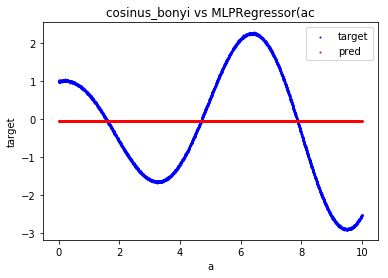

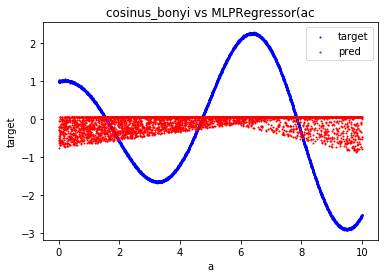

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


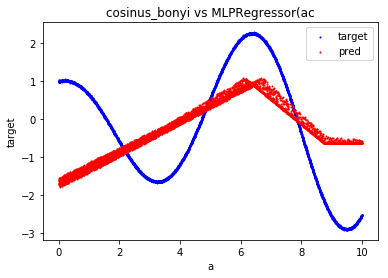

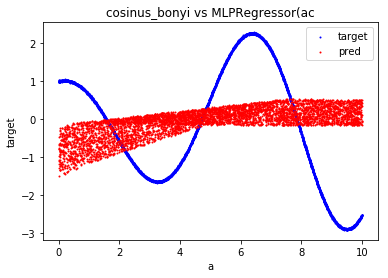

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


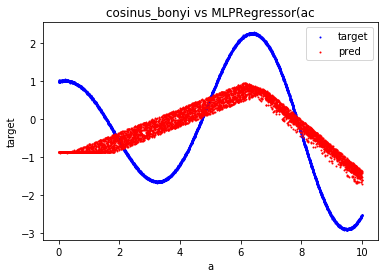

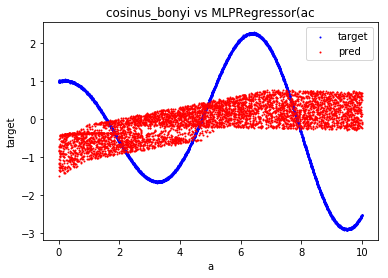

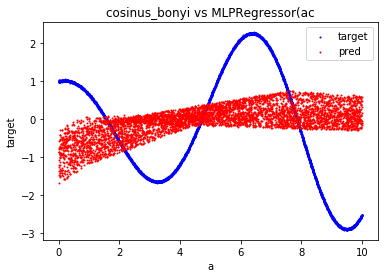

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


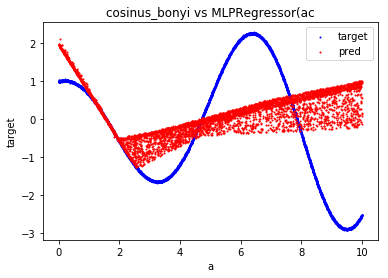

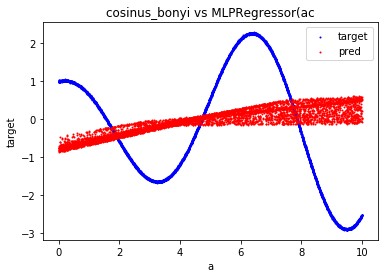

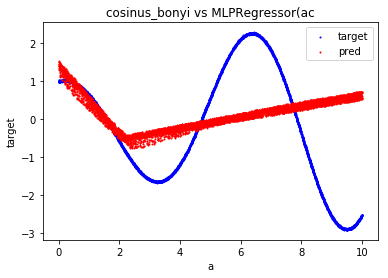

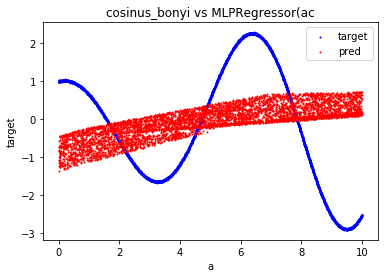

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


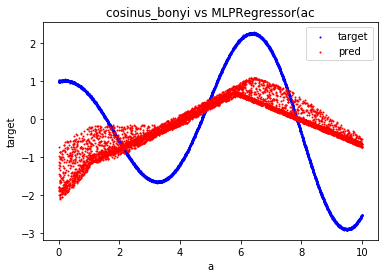

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


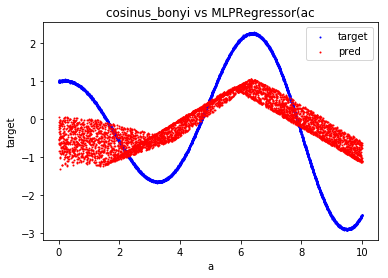

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


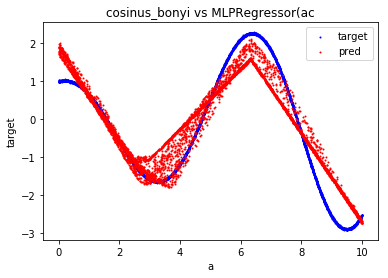

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


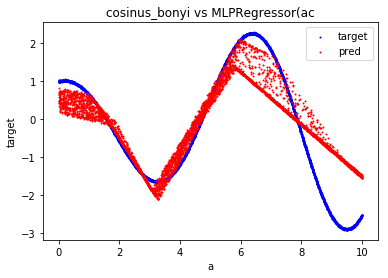

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


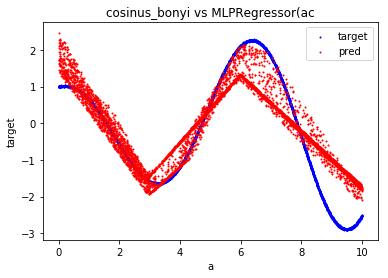

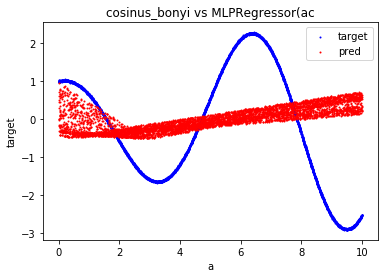

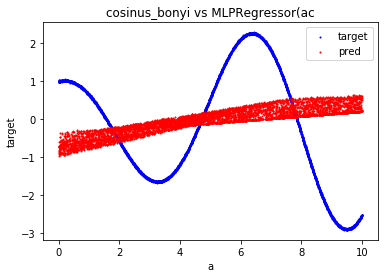

/home/jupyter/kernels/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


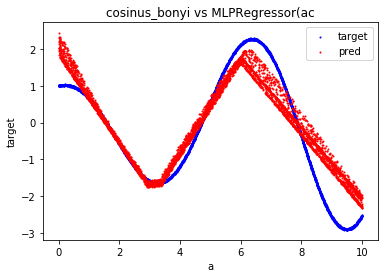

In [43]:
#for datasetname in datasets.keys():
    #print(datasetname)
    
 #éppen h csak elmozdul az átlagtól és ezen a tartományon annyira pici a hiba, ő mindig az előző algor hibájával dolgozik   
# ha 20 helyett 200 estimatiort engedsz máris gyönyörű lesz  
df=datasets["cosinus_bonyi"].copy()
train_df=df.iloc[:5000,:].copy()
test_df=df.iloc[5000:,:].copy()
    
train_df=train_df[train_df['a']>1.0]
train_df=train_df[train_df['a']<9.0].copy()
    
for i in range(1,20):
        model=MLPRegressor(hidden_layer_sizes=(i,))
        bemeno_valtozok= train_df.columns[:2]
        model.fit(train_df[bemeno_valtozok], train_df['target'])
        test_df['pred']=model.predict(test_df[bemeno_valtozok])
        egydimenziosat_rajzol(test_df, datasetname+ " vs "+str(model)[:15])